# Laboratorio 5 - Parte 2

### Máquinas de Vectores de Soporte

### 2018-II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co

## Guía del laboratorio

En esta archivo va a encontrar tanto celdas de código cómo celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

#### Primer integrante: John David Gonzalez 1017204873
#### Segundo integrante: Mateo Llano 1045025062

In [3]:
from __future__ import division
import numpy as np
import math
import matplotlib.pyplot as plt
#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")
%matplotlib inline

## Ejercicio 1

En este ejercicio usaremos la regresión por vectores de soporte para resolver el problema de regresión de la base de datos AirQuality (https://archive.ics.uci.edu/ml/datasets/Air+Quality).

La siguiente celda de código limpia la base de datos de todos sus datos faltantes y la deja lista en la variable DataBase.

In [4]:
#cargamos la bd de entrenamiento
db = np.loadtxt('BDatos/AirQuality.data',delimiter='\t')  # Assuming tab-delimiter
print ("Dim de la base de datos original: " + str(np.shape(db)))
db = db.reshape(9357,13)
DataBase = db
#La base d edatos AirQuality tiene muchos valores perdidos, vamos a quitar todos esos registros de la base de datos
#Están marcados como -200. Donde haya un valor -200 eliminaremos el registro.
j = 0
for i in range(0,np.size(db,0)):
    if -200 == db[i,12]:
        #print i
        j+=1
        DataBase = np.delete(DataBase,i,0)
    
print ("\nHay " + str(j) + " valores perdidos en la variable de salida. :(")

print ("\nDim de la base de datos sin las muestras con variable de salida perdido "+ str(np.shape(DataBase)))

#Ya hemos eliminado los registros con valor de la variable de salida perdido.

#Ahora vamos a imputar los valores perdidos en cada una de las características
print ("\nProcesando imputación de valores perdidos en las características . . .\n")

#data = open("AirQuality_cleaned.data", "w")

for k in range(0,np.size(DataBase,0)):
    for w in range(0,13):
        if -200 == DataBase[k,w]:
            DataBase[k,w] = round(np.mean(DataBase[:,w]))
        
    #data.write(str(DataBase[k,:]))

#data.close()
print ("Imputación finalizada.\n")

hay_missed_values = False
for i in range(0,np.size(DataBase,0)):
    if -200 in DataBase[i,:]:
        hay_missed_values = True
if(hay_missed_values):
    print ("Hay valores perdidos")
else:
    print ("No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase")

Dim de la base de datos original: (9357, 13)

Hay 366 valores perdidos en la variable de salida. :(

Dim de la base de datos sin las muestras con variable de salida perdido (8991, 13)

Procesando imputación de valores perdidos en las características . . .

Imputación finalizada.

No hay valores perdidos en la base de datos. Ahora se puede procesar. La base de datos está en la variable DataBase


In [5]:
X = DataBase[:,0:12]

Y = DataBase[:,12]

Definimos la función

In [6]:
#Mean Absolute Percentage Error para los problemas de regresión
def MAPE(Y_est,Y):
    ind = Y != 0 #Remueve los elementos que son cero en la variable deseada
    N = np.size(Y[ind])
    mape = np.sum(abs((Y_est[ind].reshape(N,1) - Y[ind].reshape(N,1))/(Y[ind].reshape(N,1)+np.finfo(np.float).eps)))/N
    return mape 

Complete el código siguiente para usar la regresión por vectores de suporte usando la librería sklearn. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [22]:
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.svm import SVR
import time
tiempo_i = time.time()

#Complete el código para crear el modelo SVM para regresión. 
#Use un kernel rbf con una malla de valores así: C en {0.1, 100} y gamma en {0.0001, 0.1}
#clf = ...

def svr(kerne, c, gamm):
    if(gamm == 0):
        gamm = 'auto'
    #Implemetamos la metodología de validación cross validation con 10 folds
    Folds = 5
    porcentajeVectores = np.zeros(Folds)
    Errores = np.ones(Folds)
    j = 0
    kf = KFold(n_splits=Folds)

    for train_index, test_index in kf.split(X):

        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]  

        #Complete el código
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)


        # Entrenar el modelo
        modelo = SVR(kernel=kerne, gamma=gamm, C=c).fit(X_train, y_train)


        # Validación del modelo
        ypred = modelo.predict(X_test)

        porcentajeVectores[j] = np.sum(len(modelo.support_))/np.shape(X_train)[0]

        Errores[j] = MAPE(ypred, y_test)
        j+=1

    print("Error de validación: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))
    print("% de vectores de soporte " + str(np.mean(porcentajeVectores)))
    print ("Tiempo total de ejecución: " + str(time.time()-tiempo_i) + " segundos.\n")
    return (np.mean(Errores), np.std(Errores), np.mean(porcentajeVectores), ypred, y_test)

In [12]:
svr('rbf', 100, 1)

Error de validación: 0.2259390395748797 +/- 0.11094914643434282
% de vectores de soporte 0.21910801302774435
Tiempo total de ejecución: 5.358948707580566 segundos.



(0.2259390395748797, 0.11094914643434282, 0.21910801302774435)

## Ejercicio 2

Una vez complete el código, realice las simulaciones necesarias para llenar la tabla siguiente:

In [16]:
import pandas as pd
import qgrid
df_types = pd.DataFrame({
    'Kernel' : pd.Series(['linear','linear','linear','linear','linear','linear','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf','rbf']),
    'C' : pd.Series([0.001,0.01,0.1,1,10,100,0.001,0.001,0.001,0.01,0.01,0.01,0.1,0.1,0.1,1,1,1,10,10,10,100,100,100]),
    'gamma' : pd.Series([0,0,0,0,0,0,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1,0.01,0.1,1])})
df_types["MAPE Promedio"] = ""
df_types["Intervalo de confianza"] = ""
df_types["% de Vectores de Soporte"] = ""
df_types.set_index(['Kernel','C','gamma'], inplace=True)
df_types["MAPE Promedio"][23] = "0.2259"
df_types["Intervalo de confianza"][23] = "0.1109"
df_types["% de Vectores de Soporte"][23] = "0.2191"
#df_types.sort_index(inplace=True)
j=0
for i in df_types.index:
    (efival, interval, porcen) = svr(i[0], i[1], i[2])
    df_types["MAPE Promedio"][j] = efival
    df_types["Intervalo de confianza"][j] = interval
    df_types["% de Vectores de Soporte"][j] = porcen
    j+=1

qgrid_widget = qgrid.show_grid(df_types, show_toolbar=False)
qgrid_widget

Error de validación: 0.21532161504323985 +/- 0.06460100562932213
% de vectores de soporte 0.3786300277723352
Tiempo total de ejecución: 167.50365018844604 segundos.

Error de validación: 0.24490897173183038 +/- 0.0962859267563447
% de vectores de soporte 0.37665612594249104
Tiempo total de ejecución: 170.09650659561157 segundos.

Error de validación: 0.27680077418621385 +/- 0.13461740462666608
% de vectores de soporte 0.384970000032475
Tiempo total de ejecución: 175.80913662910461 segundos.

Error de validación: 0.2869582909645992 +/- 0.15071982828475336
% de vectores de soporte 0.38622128608226974
Tiempo total de ejecución: 199.2406325340271 segundos.

Error de validación: 0.2866052170692736 +/- 0.1500497705716069
% de vectores de soporte 0.38633249759104876
Tiempo total de ejecución: 367.15748500823975 segundos.

Error de validación: 0.28853639336068776 +/- 0.1531772568363643
% de vectores de soporte 0.3863047005129662
Tiempo total de ejecución: 1989.8527204990387 segundos.

Error de

/home/jdavid/anaconda3/lib/python3.7/site-packages/qgrid/grid.py:827: DeprecationWarning: QgridWidget._df_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _df_changed(self):


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [18]:
qgrid_widget.get_changed_df()

MAPE Promedio Intervalo de confianza  \
Kernel C       gamma                                        
linear 0.001   0.00       0.215322               0.064601   
       0.010   0.00       0.244909              0.0962859   
       0.100   0.00       0.276801               0.134617   
       1.000   0.00       0.286958                0.15072   
       10.000  0.00       0.286605                0.15005   
       100.000 0.00       0.288536               0.153177   
rbf    0.001   0.01       0.401492               0.206201   
               0.10       0.328517               0.140224   
               1.00       0.490525               0.285944   
       0.010   0.01       0.183024               0.038078   
               0.10       0.179283              0.0505625   
               1.00       0.390559               0.234163   
       0.100   0.01       0.147499              0.0382111   
               0.10       0.149947               0.054459   
               1.00       0.268583               0.150405   
       1.000   0.01       0.204431               0.187421   
               0.10       0.191668               0.140413   
               1.00       0.237877               0.129976   
       10.000  0.01       0.559006               0.912322   
               0.10       0.180296               0.170924   
               1.00       0.222613                 0.1083   
       100.000 0.01       0.690361                1.20966   
               0.10       0.214146               0.203581   
               1.00       0.225939               0.110949   

                     % de Vectores de Soporte  
Kernel C       gamma                           
linear 0.001   0.00                   0.37863  
       0.010   0.00                  0.376656  
       0.100   0.00                   0.38497  
       1.000   0.00                  0.386221  
       10.000  0.00                  0.386332  
       100.000 0.00                  0.386305  
rbf    0.001   0.01                  0.747025  
               0.10                   0.64256  
               1.00                  0.769381  
       0.010   0.01                  0.443388  
               0.10                  0.278001  
               1.00                  0.561563  
       0.100   0.01                  0.190497  
               0.10                  0.151763  
               1.00                  0.269019  
       1.000   0.01                  0.122039  
               0.10                  0.165749  
               1.00                  0.216689  
       10.000  0.01                  0.163776  
               0.10                   0.10441  
               1.00                  0.213297  
       100.000 0.01                  0.102103  
               0.10                  0.104604  
               1.00                  0.219108

3.1 ¿Cuál es la finalidad de usar las funciones kernel en el modelo SVM?

R/: Las funciónes kernel son usadas para asignar al conjunto de datos original a un espacio dimensional superior con fin de convertirlo a un conjunto de datos lineal. 



3.2 ¿En este caso el porcentaje de vectores de soporte provee una información similar que en el problema de clasificación? Explique su respuesta.

R/: Si proveen información similar aunque para el caso de regresión se requiere una mayor cantidad de vectores de soporte ya que se requiere hacer una mejor generalización de los datos 
    
    

3.3 Realice una gráfica de las salidas reales vs las predicciones del modelo SVM, para evaluar visualmente el desempeño del mismo. Esto solo para la configuración en la cuál se encontró el menor error.

In [7]:
'''Complete el código para hacer la gráfica aquí'''

'Complete el c\xc3\xb3digo para hacer la gr\xc3\xa1fica aqu\xc3\xad'

In [25]:
(algo,algo1,algo2,ypred, ytest) = svr('rbf', 0.1, 0.001)

Error de validación: 0.21195028892933138 +/- 0.09351588272226319
% de vectores de soporte 0.43757709533137434
Tiempo total de ejecución: 90.86162805557251 segundos.



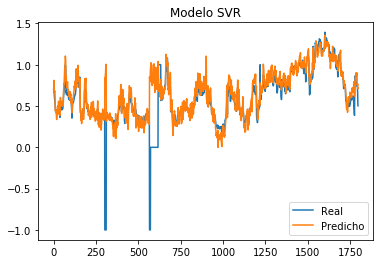

In [28]:
plt.plot(ytest)
plt.plot(ypred)
plt.title('Modelo SVR')
plt.legend(['Real', 'Predicho'])
plt.show()